# Descriptive statistics in Python -- part 2

## Association between two variables



In [1]:
import pandas as pd

csv_url = "https://docs.google.com/spreadsheets/d/1H6b5mkq68MeRQyP0Cr2weCpVkzmpR0c2Oi7p147o2a0/export?format=csv"

# Read the sheet into a DataFrame
d = pd.read_csv(csv_url)

print(d.head())

   height  handedness  right_hand_span  left_hand_span  head_circ eye_colour  \
0     159        0.88             19.0            19.0       54.0       Blue   
1     160       -1.00             19.0            20.0       57.0      Green   
2     161        0.79             17.0            16.5       57.0      hazel   
3     162        0.79             16.0            16.0       57.0       gray   
4     162        0.79             16.0            16.0       54.0      Brown   

   gender  siblings  movies  soda   bedtime       fb_freq  fb_friends  \
0  Female         2     3.0   7.0  02:00:00    once a day       135.0   
1  Female         2     0.5   2.0  04:30:00             0         1.0   
2  Female         3     3.0   2.0  23:50:00   once a week       354.0   
3  Female         2     0.0   2.0  23:10:00  almost never       192.0   
4  Female         2     1.0   3.0  00:00:00         never         1.0   

                  stat_likert  
0  Neither agree nor disagree  
1              S

### Correlation between two quantitative variables 

* [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

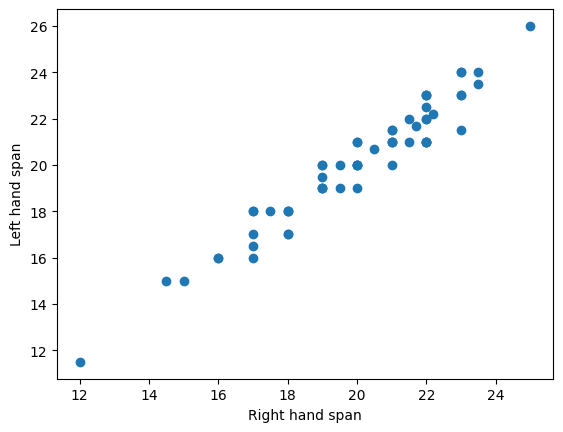

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x=d['right_hand_span'], y=d['left_hand_span'])
plt.xlabel("Right hand span")
plt.ylabel("Left hand span")
plt.show()

In [6]:
# Pearson correlation using pandas 
 
d['right_hand_span'].corr(d['left_hand_span'])

np.float64(0.9686544707121261)

In [11]:
from scipy import stats
stats.pearsonr(d['right_hand_span'], d['left_hand_span'])

PearsonRResult(statistic=np.float64(0.9686544707121258), pvalue=np.float64(8.947847360727553e-37))

Correlation matrix: include all quantitative variables in the d dataframe.

In [15]:
quantd = d.iloc[:, [0,1,2,3,4,7,8,9,12]]
quantd.corr()

,height,handedness,right_hand_span,left_hand_span,head_circ,siblings,movies,soda,fb_friends
height,1.000000,0.017892,0.591185,0.550145,0.568935,-0.026601,-0.096400,0.206910,0.342675
handedness,0.017892,1.000000,-0.050072,-0.078869,0.080501,-0.394286,0.061350,0.125782,-0.105878
right_hand_span,0.591185,-0.050072,1.000000,0.968654,0.269547,0.154334,-0.210891,0.140498,0.119650
left_hand_span,0.550145,-0.078869,0.968654,1.000000,0.270797,0.109671,-0.215022,0.135761,0.093193
head_circ,0.568935,0.080501,0.269547,0.270797,1.000000,-0.051706,-0.052449,0.212839,0.240536
siblings,-0.026601,-0.394286,0.154334,0.109671,-0.051706,1.000000,-0.091922,-0.062546,0.260184
movies,-0.096400,0.061350,-0.210891,-0.215022,-0.052449,-0.091922,1.000000,0.013402,-0.080083
soda,0.206910,0.125782,0.140498,0.135761,0.212839,-0.062546,0.013402,1.000000,0.074598
fb_friends,0.342675,-0.105878,0.119650,0.093193,0.240536,0.260184,-0.080083,0.074598,1.000000


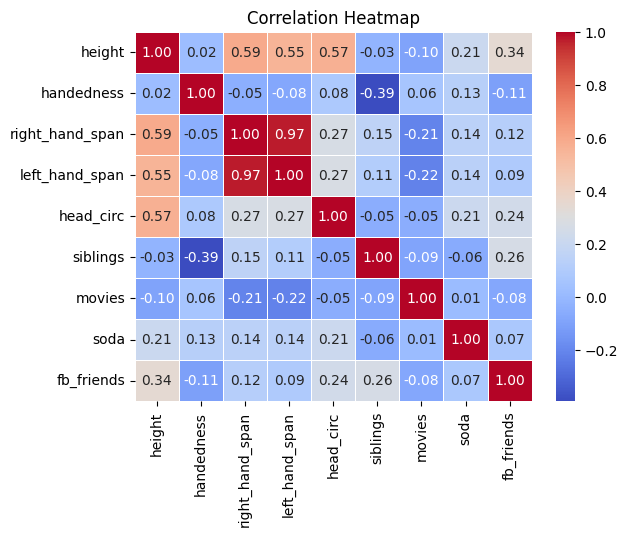

In [20]:
import seaborn as sns
matrix = quantd.corr()

plt.clf()
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



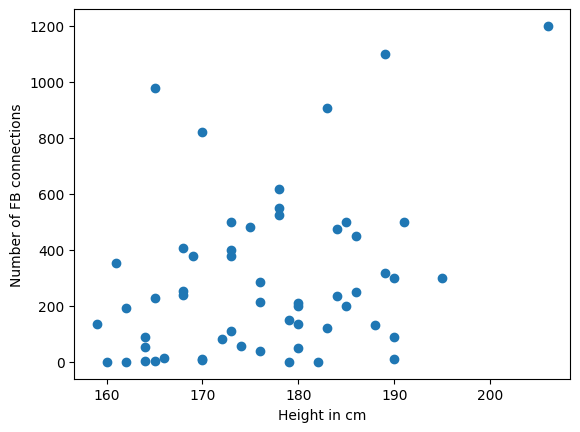

In [21]:
plt.clf()
plt.scatter(x=d['height'], y=d['fb_friends'])
plt.xlabel("Height in cm")
plt.ylabel("Number of FB connections")
plt.show()

* [Spearman's rank correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)

In [23]:
from scipy import stats
print(stats.pearsonr(d['right_hand_span'], d['left_hand_span']))
print(stats.spearmanr(d['right_hand_span'], d['left_hand_span']))

PearsonRResult(statistic=np.float64(0.9686544707121258), pvalue=np.float64(8.947847360727553e-37))
SignificanceResult(statistic=np.float64(0.9578563506158387), pvalue=np.float64(4.123643974124403e-33))


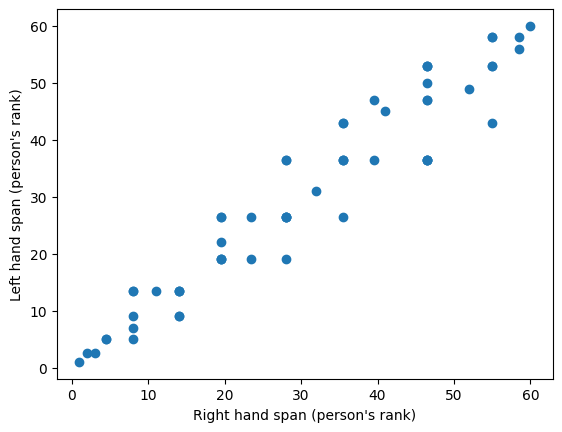

In [29]:
import matplotlib.pyplot as plt

plt.scatter(x=d['right_hand_span'].rank(), y=d['left_hand_span'].rank())
plt.xlabel("Right hand span (person's rank)")
plt.ylabel("Left hand span (person's rank)")
plt.show()

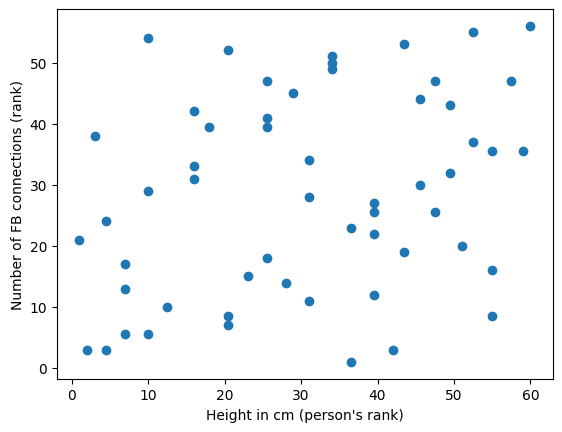

In [30]:
import matplotlib.pyplot as plt

plt.scatter(x=d['height'].rank(), y=d['fb_friends'].rank())
plt.xlabel("Height in cm (person's rank)")
plt.ylabel("Number of FB connections (rank)")
plt.show()

In [38]:
import numpy as np
mask = ~np.isnan(d['height']) & ~np.isnan(d['fb_friends'])

print(stats.pearsonr(d['height'][mask], d['fb_friends'][mask]))
print(stats.spearmanr(d['height'][mask], d['fb_friends'][mask]))

PearsonRResult(statistic=np.float64(0.34267539388707813), pvalue=np.float64(0.009729333678867424))
SignificanceResult(statistic=np.float64(0.291675295989492), pvalue=np.float64(0.029173230157031813))


In [41]:
mask = ~np.isnan(d['height']) & ~np.isnan(d['fb_friends']) & (d['gender']=="Female")
print("Female height/fb_friends correlation coefficients")
print(stats.pearsonr(d['height'][mask], d['fb_friends'][mask]))
print(stats.spearmanr(d['height'][mask], d['fb_friends'][mask]))

mask = ~np.isnan(d['height']) & ~np.isnan(d['fb_friends']) & (d['gender']=="Male")
print("Male height/fb_friends correlation coefficients")
print(stats.pearsonr(d['height'][mask], d['fb_friends'][mask]))
print(stats.spearmanr(d['height'][mask], d['fb_friends'][mask]))

Female height/fb_friends correlation coefficients
PearsonRResult(statistic=np.float64(0.36024868025684975), pvalue=np.float64(0.09957398919109728))
SignificanceResult(statistic=np.float64(0.5137449407539354), pvalue=np.float64(0.01445791948113338))
Male height/fb_friends correlation coefficients
PearsonRResult(statistic=np.float64(0.44237488717259504), pvalue=np.float64(0.008800727677794447))
SignificanceResult(statistic=np.float64(0.2849925569058169), pvalue=np.float64(0.10232152591220925))


In [44]:
import numpy as np
mask = ~np.isnan(d['height']) & ~np.isnan(d['fb_friends'])

print(stats.kendalltau(d['right_hand_span'][mask], d['left_hand_span'][mask]))
print(stats.kendalltau(d['height'][mask], d['fb_friends'][mask]))

SignificanceResult(statistic=np.float64(0.8821480527078385), pvalue=np.float64(1.624534711350392e-19))
SignificanceResult(statistic=np.float64(0.21064022539950655), pvalue=np.float64(0.02394282438367044))


Kendall Tau and Spearman correlation may be used for categorical ordinal variables as well. 

In [46]:
d['stat_likert'] = pd.Categorical(d['stat_likert'], 
                                   categories=["Strongly disagree", "Somewhat disagree", "Neither agree nor disagree", "Somewhat agree", "Strongly agree"], 
                                   ordered=True)

In [48]:
print(stats.spearmanr(d['height'], d['stat_likert']))
print(stats.kendalltau(d['height'], d['stat_likert']))

SignificanceResult(statistic=np.float64(0.0730490973825828), pvalue=np.float64(0.5791170717209784))
SignificanceResult(statistic=np.float64(0.056135401617179975), pvalue=np.float64(0.5798253025907862))


Association measures between quantitative and binary variable (say, height and gender, hand size and gender...)

* Cohen's d (difference between the means adjusted for the pooled standard deviation)
* point-biserial correlation coefficient (Pearson correlation when one of the variables is 0/1)
* probability of superiority (AUC, C-statistic, common language effect size...)
* Somers D = 2*AUC-1

In [14]:
# In order to compute the Cohen's d measure I need means and sd-s in two groups.
import numpy as np
mask = (d['gender']=="Male")
print("Average height of males: ")
mean1 = np.mean(d['height'][mask])
print(mean1)
print("Average height of females: ")
mean2 = np.mean(d['height'][~mask])
print(mean2)
print("SD (males): ")
sd1 = np.std(d['height'][mask])
print(sd1)
print("SD (females): ")
sd2 = np.std(d['height'][~mask])
print(sd2)

Average height of males: 
181.91666666666666
Average height of females: 
167.66666666666666
SD (males): 
8.27101700047958
SD (females): 
5.734883511361751


$$ \text{Cohen's d} = \frac{\bar{x}_1 - \bar{x}_2}{\text{sd}_{pooled}}$$

$$\text{sd}_{pooled} = \sqrt{\frac{(n_1-1)\cdot s_1^2+(n_2-1)\cdot s_2^2}{n_1+n_2-2}}$$

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13    False
14     True
15    False
16     True
17     True
18    False
19     True
20    False
21     True
22     True
23    False
24     True
25    False
26    False
27    False
28     True
29    False
30    False
31    False
32     True
33     True
34    False
35    False
36    False
37    False
38    False
39     True
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
Name: gender, dtype: bool